## Classifying movie reviews: IMDB dataset

- Learning to classify movie reviews as positive or negative, based on the content of the review.
- Two class classification or a binary classification problem.

### IMDB dataset

- 50,000 polarised reviews from Internet Movie Database.
- 25,000 reviews for training and 25,000 reviews for testing.

In [1]:
# Loading the IMDB dataset

from keras.datasets import imdb

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

# the num_words = 10000 : keeps top 10000 most frequently occuring words in training data helping to work with data of manageable size.

/Users/nidhiashok/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


- train_data and test_data are lists of reviews: encoding a sequence of words.
- train_label or test_label: list of 0 and 1 : 0 for negative and 1 for positive.

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
# trying to decode it back to english

word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [5]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparation of the data

- Lists need to be converted into tensors before feeding to the neural network.
- There are two ways to do it:
    1. Padding the list:pad them so that all have same length, turn them into integer tensor of shape (samples, word_indices), use embedding layer as the first neural network layer that can handle it.
    2. One-hot encode your lists, vectors of 1s and 0s, example convert [3,5] into a 10000 dimensional vector, all 0s except for indices 3 and 5. Now first layer can be a dense layer.

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [8]:
# vectorising the labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

- The input data is vector and labels are scalar.
- This is best for a simple stack of fully connected layers with relu activation.
- sigmoid activation is used to output a probability indicating how likely the sample will have the target. 
- A relu function is meant to zero out negative values, sigmoid squashes arbitrary values into the interval [0,1].

In [9]:
# defining the model

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [10]:
# compiling the model

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# validating the set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
# training the model

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 76ms/step - loss: 0.5281 - acc: 0.7806 - val_loss: 0.3990 - val_acc: 0.8704
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3141 - acc: 0.9028 - val_loss: 0.3082 - val_acc: 0.8897
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2294 - acc: 0.9253 - val_loss: 0.2787 - val_acc: 0.8926
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1802 - acc: 0.9415 - val_loss: 0.2842 - val_acc: 0.8863
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1410 - acc: 0.9554 - val_loss: 0.2810 - val_acc: 0.8886
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1164 - acc: 0.9637 - val_loss: 0.3415 - val_acc: 0.8725
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0981 - acc: 0.9704 - val_loss: 0.3141 - val_acc: 0.8836
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0795 - a

In [13]:
# to understand what went on during the training

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

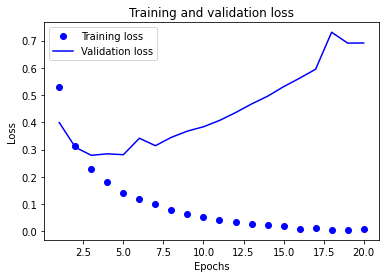

In [14]:
# understanding training and validation loss by plotting

import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(history_dict['acc'])+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

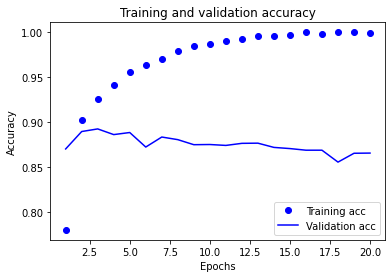

In [15]:
# understanding training and validation accuracy by plotting

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']


plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- After the second epoch, we are overfitting the data on the training set. 
- To prevent overfitting in this case, we can stop training after 3 epochs.

In [16]:
# retraining the model

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4,batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4633 - accuracy: 0.8267
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2722 - accuracy: 0.9070
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2107 - accuracy: 0.9244
Epoch 4/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1755 - accuracy: 0.9382


In [17]:
results = model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 2ms/step - loss: 0.2859 - accuracy: 0.8856


In [18]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.23659992],
       [0.9994456 ],
       [0.8555123 ],
       ...,
       [0.10903489],
       [0.08681352],
       [0.6203284 ]], dtype=float32)

#### Indulging in experimenting

In [19]:
# Trying to add a third layer

model_3L = models.Sequential()
model_3L.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model_3L.add(layers.Dense(16,activation='relu'))
model_3L.add(layers.Dense(16,activation='relu'))
model_3L.add(layers.Dense(1,activation='sigmoid'))

In [20]:
model_3L.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history_3L = model_3L.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 77ms/step - loss: 0.5599 - acc: 0.7755 - val_loss: 0.4252 - val_acc: 0.8616
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3336 - acc: 0.8945 - val_loss: 0.3135 - val_acc: 0.8863
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2378 - acc: 0.9203 - val_loss: 0.2805 - val_acc: 0.8911
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1799 - acc: 0.9407 - val_loss: 0.2796 - val_acc: 0.8901
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1473 - acc: 0.9531 - val_loss: 0.2835 - val_acc: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1147 - acc: 0.9658 - val_loss: 0.3279 - val_acc: 0.8742
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0914 - acc: 0.9718 - val_loss: 0.3710 - val_acc: 0.8710
Epoch 8/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0735 - a

In [21]:
history_dict3 = history_3L.history
history_dict3.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

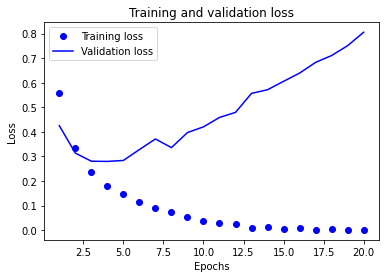

In [22]:
# understanding training and validation loss by plotting

import matplotlib.pyplot as plt

loss_values = history_dict3['loss']
val_loss_values = history_dict3['val_loss']

epochs = range(1,len(history_dict['acc'])+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

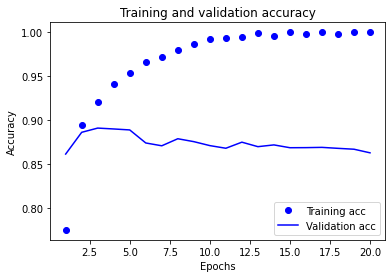

In [23]:
# understanding training and validation accuracy by plotting

acc_values = history_dict3['acc']
val_acc_values = history_dict3['val_acc']


plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- The model_3L indicate extreme overfitting as there is a huge gap between the train and validation. Adding a layer has increased the overfitting.

In [24]:
# Trying layers with more hidden units

model_MU = models.Sequential()
model_MU.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model_MU.add(layers.Dense(32,activation='relu'))
model_MU.add(layers.Dense(1,activation='sigmoid'))

In [25]:
model_MU.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history_MU = model_MU.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

history_dictM = history_MU.history
history_dictM.keys()

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.5078 - acc: 0.7833 - val_loss: 0.3961 - val_acc: 0.8466
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2977 - acc: 0.9026 - val_loss: 0.3183 - val_acc: 0.8748
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2145 - acc: 0.9297 - val_loss: 0.2952 - val_acc: 0.8816
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1672 - acc: 0.9460 - val_loss: 0.2787 - val_acc: 0.8874
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1353 - acc: 0.9570 - val_loss: 0.2860 - val_acc: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1105 - acc: 0.9659 - val_loss: 0.3031 - val_acc: 0.8832
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0871 - acc: 0.9748 - val_loss: 0.3708 - val_acc: 0.8682
Epoch 8/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0723 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

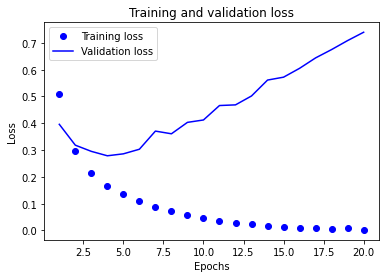

In [26]:
# understanding training and validation loss by plotting

import matplotlib.pyplot as plt

loss_values = history_dictM['loss']
val_loss_values = history_dictM['val_loss']

epochs = range(1,len(history_dict['acc'])+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

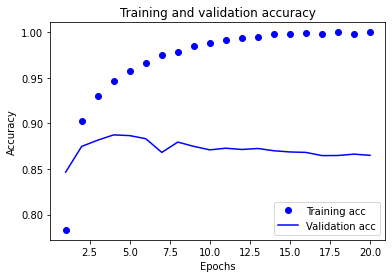

In [27]:
# understanding training and validation accuracy by plotting

acc_values = history_dictM['acc']
val_acc_values = history_dictM['val_acc']


plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [28]:
# Trying layers with loss as mse

model_LO = models.Sequential()
model_LO.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model_LO.add(layers.Dense(16,activation='relu'))
model_LO.add(layers.Dense(1,activation='sigmoid'))

model_LO.compile(optimizer='rmsprop',loss='mse',metrics=['acc'])

history_LO = model_LO.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

history_dictLO = history_LO.history
history_dictLO.keys()

Epoch 1/20
30/30 [==============================] - 3s 74ms/step - loss: 0.1764 - acc: 0.7759 - val_loss: 0.1236 - val_acc: 0.8743
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0950 - acc: 0.9069 - val_loss: 0.0961 - val_acc: 0.8851
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0672 - acc: 0.9303 - val_loss: 0.0875 - val_acc: 0.8880
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0515 - acc: 0.9471 - val_loss: 0.0838 - val_acc: 0.8905
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0411 - acc: 0.9581 - val_loss: 0.0832 - val_acc: 0.8890
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0338 - acc: 0.9658 - val_loss: 0.0835 - val_acc: 0.8861
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0275 - acc: 0.9734 - val_loss: 0.0909 - val_acc: 0.8760
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0226 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

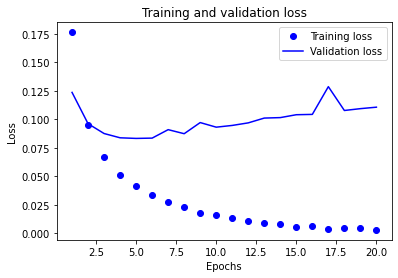

In [29]:
# understanding training and validation loss by plotting

import matplotlib.pyplot as plt

loss_values = history_dictLO['loss']
val_loss_values = history_dictLO['val_loss']

epochs = range(1,len(history_dict['acc'])+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Key take away

- Preprocessing on raw data is required to feed as tensors into neural network.
- Dense layers with activations can solve a wide range of problems.
- Binary classification, the network ends with a Dense layer having one unit and sigmoid activation.
- Loss function that should be used is binary_crossentropy
- rmsprop is a good optimizer for wide range of problems.
- neural networks eventually start overfitting and end up obtaining increasingly worse results, hence monitor performance on data outside of the training set.